In [1]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup

In [2]:
url ="http://corners.gmarket.co.kr/Bestsellers"

In [3]:
response = requests.get(url)
response

<Response [200]>

In [4]:
dom = BeautifulSoup(response.text, "html.parser")
type(dom)


bs4.BeautifulSoup

In [5]:
elements = dom.select("#gBestWrap > div > div:nth-child(5) > div > ul > li")
len(elements)

200

In [6]:
elements[0]

<li class="first">
<p class="no1" id="no1">1</p>
<div class="thumb">
<a href="http://item.gmarket.co.kr/Item?goodscode=2266434001&amp;ver=637952907171729296" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2266434001'});"><img alt="3900원 균일가 시즌오프 블라우스/티셔츠/원피스/팬츠 外" class="lazy" data-original="//gdimg.gmarket.co.kr/2266434001/still/300?ver=2022080510" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
</div>
<!--div class="goods-view">
									<a href="http://minishop.gmarket.co.kr/kunwon1005"><span class="view">판매자 다른상품 보기</span>주식회사건원</a>
								</div-->
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2266434001&amp;ver=637952907171729296" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2266434001'});">3900원 균일가 시즌오프 블라우스/티셔츠/원피스/팬츠 外</a>
<div class="item_price">
<div class="o-price"><span><span>13,000원</span></span></div>
<div class="s-price">
<strong><span><span>3,900원</span></span></

In [13]:
list = []
for element in elements:
    data = {
        "title" : element.select_one(".itemname").text,
        "o-price" : element.select_one(".o-price").text,
        "s-price" : element.select_one(".s-price > strong").text,
        "img" : "http:"+ element.select_one("img").get("data-original"), 
    }
    list.append(data)
list[0:2]

[{'title': '3900원 균일가 시즌오프 블라우스/티셔츠/원피스/팬츠 外',
  'o-price': '13,000원',
  's-price': '3,900원',
  'img': 'http://gdimg.gmarket.co.kr/2266434001/still/300?ver=2022080510'},
 {'title': '청정우 양지 300gX3팩',
  'o-price': '31,800원',
  's-price': '15,900원',
  'img': 'http://gdimg.gmarket.co.kr/1587075039/still/300?ver=2022080510'}]

In [34]:
df = pd.DataFrame(list)
df
df.to_csv('C:/Users/User/Desktop/code/gmarket.csv', index = None) #csv파일로 생성

In [15]:
# 4. download image

In [16]:
# make directory
import os

if not os.path.exists("datas"):           
    os.makedirs("datas")

In [17]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7C6C-FC35

 C:\Users\User\Desktop\code\크롤링\day1 디렉터리

2022-08-05  오전 10:06    <DIR>          .
2022-08-05  오전 10:06    <DIR>          ..
2022-08-05  오전 10:01    <DIR>          .ipynb_checkpoints
2022-08-04  오후 12:14            64,972 01_naver_api_2.ipynb
2022-08-04  오후 12:14            32,787 01_requests_json.ipynb
2022-08-04  오후 12:14           420,230 01_requests_naver_stock.ipynb
2022-08-04  오후 12:14            19,329 02_requests_api.ipynb
2022-08-04  오후 12:14             9,003 02_requests_daum_exchange.ipynb
2022-08-04  오후 01:36            14,969 02_zigbang.ipynb
2022-08-04  오후 01:54            12,952 03_daum_exchange.ipynb
2022-08-04  오후 12:14           118,377 03_naver_api.ipynb
2022-08-04  오후 03:09             9,235 04_html.ipynb
2022-08-04  오후 12:14            15,674 04_requests_zigbang.ipynb
2022-08-04  오후 03:53             6,355 05_css selector.ipynb
2022-08-04  오후 04:45             5,838 06_bs4.ipynb
2022-08-05  오전 10:05            14,859 0

In [18]:
img_link = df.loc[0, "img"]
print(img_link)

http://gdimg.gmarket.co.kr/2266434001/still/300?ver=2022080510


In [19]:
# download image

In [20]:
response = requests.get(img_link)
response

<Response [200]>

In [21]:
with open("datas/test.png", "wb") as file:
    file.write(response.content)

In [22]:
%ls datas

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7C6C-FC35

 C:\Users\User\Desktop\code\크롤링\day1\datas 디렉터리

2022-08-05  오전 10:06    <DIR>          .
2022-08-05  오전 10:06    <DIR>          ..
2022-08-05  오전 10:06            20,611 test.png
               1개 파일              20,611 바이트
               2개 디렉터리  129,954,066,432 바이트 남음


In [23]:
from PIL import Image as pil

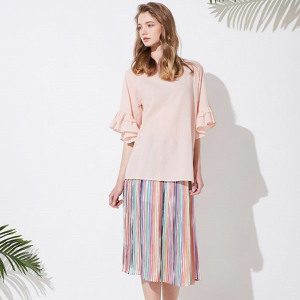

In [24]:
pil.open("datas/test.png")

In [25]:
# 5개의 아이템 이미지 다운로드
for idx, data in df[:5].iterrows():
    filename = "0" * (3 - len(str(idx))) + str(idx)
    print(idx, end=" ")
    response = requests.get(data.img)
    with open(f"datas/{filename}.png", "wb") as file:
        file.write(response.content)

0 1 2 3 4 

In [26]:
%ls datas

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7C6C-FC35

 C:\Users\User\Desktop\code\크롤링\day1\datas 디렉터리

2022-08-05  오전 10:06    <DIR>          .
2022-08-05  오전 10:06    <DIR>          ..
2022-08-05  오전 10:06            20,611 000.png
2022-08-05  오전 10:06            37,945 001.png
2022-08-05  오전 10:06            36,219 002.png
2022-08-05  오전 10:06            34,207 003.png
2022-08-05  오전 10:06            13,381 004.png
2022-08-05  오전 10:06            20,611 test.png
               6개 파일             162,974 바이트
               2개 디렉터리  129,953,910,784 바이트 남음


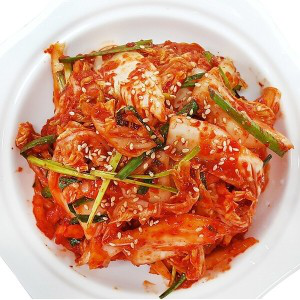

In [27]:
pil.open("datas/002.png")